# Unsupervised contacts in Tir

In [1]:
import esm
import torch

import matplotlib.pyplot as plt

from esm_contacts.main import calc_contact_df, plot_contact_arcs

In [2]:
# Load ESM-2 model
model, alphabet = esm.pretrained.esm2_t33_650M_UR50D()

In [3]:
batch_converter = alphabet.get_batch_converter()
model.eval()  # disables dropout for deterministic results

sequences = [
    ("Src-Nter", "MGSNKSKPKDASQRRRSLEPAENVHGAGGGAFPASQTPSKPASADGHRGPSAAFAPAAAEPKLFGGFNSSDTVTSPQRAGPLAGG"),
    ("Yes-Nter", "MGCIKSKENKSPAIKYRPENTPEPVSTSVSHYGAEPTTVSPCPSSSAKGTAVNFSSLSMTPFGGSSGVTPFGGASSSFSVVPSSYPAGLT"),
    ("Fyn-Nter", "MGCVQCKDKEATKLTEERDGSLNQSSGYRYGTDPTPQHYPSFGVTSIPNYNNFHAAGGQGLTVFGGVNSSSHTGTLRTRGG"),
    ("Fgr-Nter", "MGCVFCKKLEPVATAKEDAGLEGDFRSYGAADHYGPDPTKARPASSFAHIPNYSNFSSQAINPGFLDSGTIRGVSG")
]

batch_labels, batch_strs, batch_tokens = batch_converter(sequences)

# Extract per-residue representations (on CPU)
with torch.no_grad():
    results = model(batch_tokens, repr_layers=[33], return_contacts=True)
token_representations = results["representations"][33]


## Contact matrices

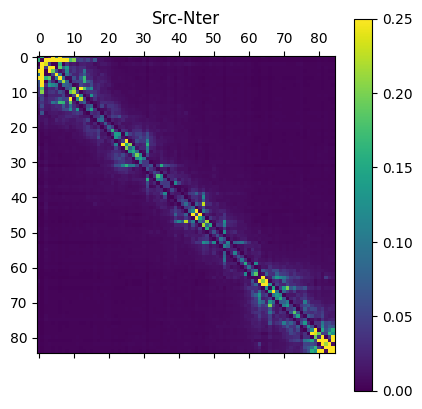

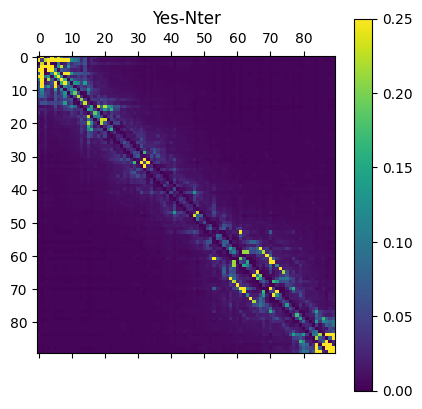

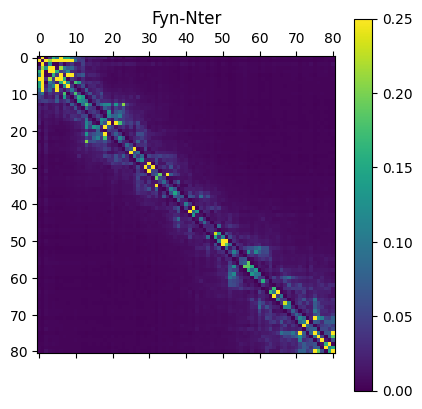

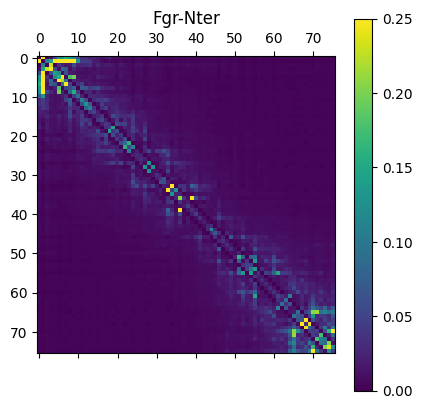

In [4]:
for (protein, seq), attention_contacts in zip(sequences, results["contacts"]):
    plt.matshow(attention_contacts[: len(seq), : len(seq)], cmap="viridis", vmin=0.0, vmax=0.25)
    plt.colorbar()
    plt.title(protein)
    plt.savefig(f"../figures/{protein}_contact_matrix.png")
    plt.show()

## Arc plots

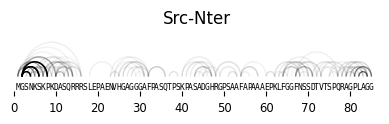

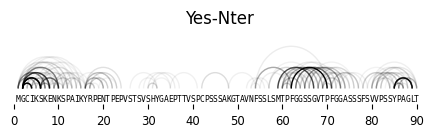

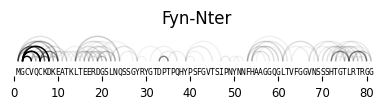

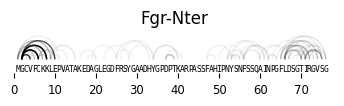

In [5]:
for (protein, seq), attention_contacts in zip(sequences, results["contacts"]):
    df = calc_contact_df(attention_contacts)
    fig, ax = plot_contact_arcs(seq, df)
    ax.set_title(protein)
    fig.savefig(f"../figures/{protein}_contact_arcs.png", bbox_inches = 'tight', dpi=300)